In [434]:
import pandas as pd

df=pd.read_csv("data/ShipmentDelivery.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252.0,5,medium,F,1,1538.0,1
10995,10996,B,Ship,4,1,232.0,5,medium,F,6,1247.0,0
10996,10997,C,Ship,5,4,242.0,5,low,F,4,1155.0,0
10997,10998,F,Ship,5,2,223.0,6,medium,M,2,1210.0,0


In [435]:
df.value_counts("Reached.on.Time_Y.N")

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [436]:
df.isna().sum()

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product     98
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms          139
Reached.on.Time_Y.N      0
dtype: int64

In [437]:
on_time_pct = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].agg(['count', 'mean']) 
on_time_pct['percentage'] = on_time_pct['mean'] * 100

on_time_pct

,count,mean,percentage
Mode_of_Shipment,,,
Flight,1777,0.601576,60.157569
Road,1760,0.588068,58.806818
Ship,7462,0.597561,59.756098


In [438]:
on_time_pct = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].agg(['count', 'mean']) 
on_time_pct['percentage'] = on_time_pct['mean'] * 100

on_time_pct

,count,mean,percentage
Warehouse_block,,,
A,1833,0.586470,58.647027
B,1833,0.602291,60.229133
C,1833,0.596836,59.683579
D,1834,0.597601,59.760087
F,3666,0.598472,59.847245


<AxesSubplot: xlabel='Warehouse_block'>

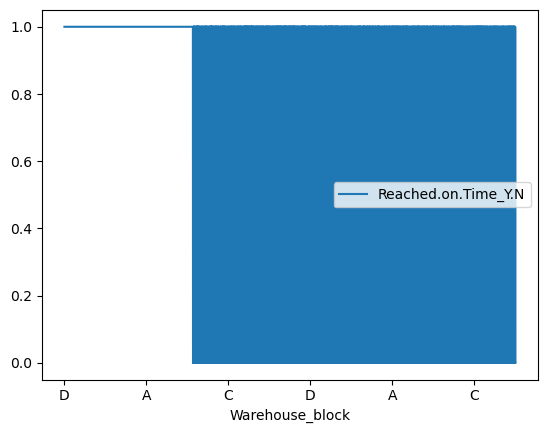

In [439]:
df=df.drop("ID",axis=1)
df.plot(x="Warehouse_block",y="Reached.on.Time_Y.N")

In [440]:
df.groupby(["Warehouse_block","Reached.on.Time_Y.N"]).count()

Mode_of_Shipment  Customer_care_calls  \
Warehouse_block Reached.on.Time_Y.N                                          
A               0                                 758                  758   
                1                                1075                 1075   
B               0                                 729                  729   
                1                                1104                 1104   
C               0                                 739                  739   
                1                                1094                 1094   
D               0                                 738                  738   
                1                                1096                 1096   
F               0                                1472                 1472   
                1                                2194                 2194   

                                     Customer_rating  Cost_of_the_Product  \
Warehouse_block Reached.on.Time_Y.N                                         
A               0                                758                  755   
                1                               1075                 1064   
B               0                                729                  725   
                1                               1104                 1093   
C               0                                739                  737   
                1                               1094                 1079   
D               0                                738                  732   
                1                               1096                 1084   
F               0                               1472                 1467   
                1                               2194                 2165   

                                     Prior_purchases  Product_importance  \
Warehouse_block Reached.on.Time_Y.N                                        
A               0                                758                 747   
                1                               1075                1062   
B               0                                729                 718   
                1                               1104                1091   
C               0                                739                 727   
                1                               1094                1080   
D               0                                738                 724   
                1                               1096                1082   
F               0                               1472                1450   
                1                               2194                2164   

                                     Gender  Discount_offered  Weight_in_gms  
Warehouse_block Reached.on.Time_Y.N                                           
A               0                       758               758            753  
                1                      1075              1075           1060  
B               0                       729               729            720  
                1                      1104              1104           1090  
C               0                       739               739            730  
                1                      1094              1094           1082  
D               0                       738               738            730  
                1                      1096              1096           1079  
F               0                      1472              1472           1461  
                1                      2194              2194           2155

In [441]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252.0,5,medium,F,1,1538.0,1
10995,B,Ship,4,1,232.0,5,medium,F,6,1247.0,0
10996,C,Ship,5,4,242.0,5,low,F,4,1155.0,0
10997,F,Ship,5,2,223.0,6,medium,M,2,1210.0,0


In [442]:
print(df["Cost_of_the_Product"].max())
print(df["Cost_of_the_Product"].min())

310.0
96.0


In [443]:
df.dtypes

Warehouse_block         object
Mode_of_Shipment        object
Customer_care_calls      int64
Customer_rating          int64
Cost_of_the_Product    float64
Prior_purchases          int64
Product_importance      object
Gender                  object
Discount_offered         int64
Weight_in_gms          float64
Reached.on.Time_Y.N      int64
dtype: object

In [444]:
cat_cols=df.select_dtypes("object").columns

In [445]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252.0,5,medium,F,1,1538.0,1
10995,B,Ship,4,1,232.0,5,medium,F,6,1247.0,0
10996,C,Ship,5,4,242.0,5,low,F,4,1155.0,0
10997,F,Ship,5,2,223.0,6,medium,M,2,1210.0,0


In [446]:
df_encoded = pd.get_dummies(df[cat_cols])
df_encoded

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,False,False,False,True,False,True,False,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,True,False,False,True
2,True,False,False,False,False,True,False,False,False,True,False,False,True
3,False,True,False,False,False,True,False,False,False,False,True,False,True
4,False,False,True,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,True,False,False,False,False,False,False,True,False,False,True,True,False
10995,False,True,False,False,False,False,False,True,False,False,True,True,False
10996,False,False,True,False,False,False,False,True,False,True,False,True,False
10997,False,False,False,False,True,False,False,True,False,False,True,False,True


In [447]:
df=pd.concat([df,df_encoded],axis=1)
df=df.drop(cat_cols,axis=1)
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177.0,3,44,1233.0,1,False,False,False,True,False,True,False,False,False,True,False,True,False
1,4,5,216.0,2,59,3088.0,1,False,False,False,False,True,True,False,False,False,True,False,False,True
2,2,2,183.0,4,48,3374.0,1,True,False,False,False,False,True,False,False,False,True,False,False,True
3,3,3,176.0,4,10,1177.0,1,False,True,False,False,False,True,False,False,False,False,True,False,True
4,2,2,184.0,3,46,2484.0,1,False,False,True,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252.0,5,1,1538.0,1,True,False,False,False,False,False,False,True,False,False,True,True,False
10995,4,1,232.0,5,6,1247.0,0,False,True,False,False,False,False,False,True,False,False,True,True,False
10996,5,4,242.0,5,4,1155.0,0,False,False,True,False,False,False,False,True,False,True,False,True,False
10997,5,2,223.0,6,2,1210.0,0,False,False,False,False,True,False,False,True,False,False,True,False,True


In [448]:
df.isna().sum()

Customer_care_calls            0
Customer_rating                0
Cost_of_the_Product           98
Prior_purchases                0
Discount_offered               0
Weight_in_gms                139
Reached.on.Time_Y.N            0
Warehouse_block_A              0
Warehouse_block_B              0
Warehouse_block_C              0
Warehouse_block_D              0
Warehouse_block_F              0
Mode_of_Shipment_Flight        0
Mode_of_Shipment_Road          0
Mode_of_Shipment_Ship          0
Product_importance_high        0
Product_importance_low         0
Product_importance_medium      0
Gender_F                       0
Gender_M                       0
dtype: int64

In [449]:
df=df.dropna()
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177.0,3,44,1233.0,1,False,False,False,True,False,True,False,False,False,True,False,True,False
1,4,5,216.0,2,59,3088.0,1,False,False,False,False,True,True,False,False,False,True,False,False,True
2,2,2,183.0,4,48,3374.0,1,True,False,False,False,False,True,False,False,False,True,False,False,True
3,3,3,176.0,4,10,1177.0,1,False,True,False,False,False,True,False,False,False,False,True,False,True
4,2,2,184.0,3,46,2484.0,1,False,False,True,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252.0,5,1,1538.0,1,True,False,False,False,False,False,False,True,False,False,True,True,False
10995,4,1,232.0,5,6,1247.0,0,False,True,False,False,False,False,False,True,False,False,True,True,False
10996,5,4,242.0,5,4,1155.0,0,False,False,True,False,False,False,False,True,False,True,False,True,False
10997,5,2,223.0,6,2,1210.0,0,False,False,False,False,True,False,False,True,False,False,True,False,True


<AxesSubplot: >

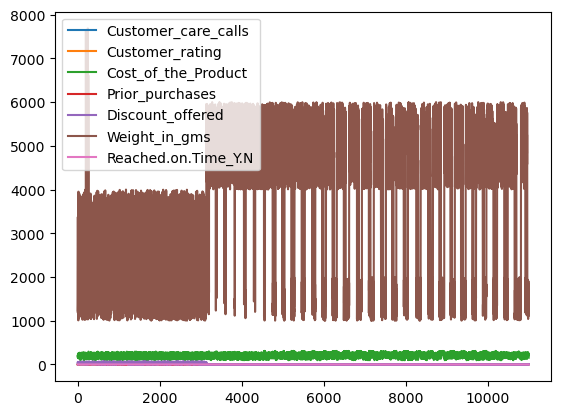

In [450]:
df.plot()

In [451]:
TARGET="Reached.on.Time_Y.N"
X=df.drop(TARGET,axis=1)
y=df[TARGET]


In [452]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

In [470]:
X.describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high
count,1.076400e+04,1.076400e+04,1.076400e+04,1.076400e+04,10764.000000,1.076400e+04
mean,-3.485382e-16,-1.373029e-16,-1.056176e-16,-6.337059e-17,0.000000,3.168529e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046,1.000046e+00
min,-1.801122e+00,-2.374800e+00,-1.029465e+00,-7.590572e-01,-1.619599,-3.038886e-01
25%,-9.241477e-01,-8.563109e-01,-3.739690e-01,-5.725376e-01,-1.102340,-3.038886e-01
50%,-4.717284e-02,7.974379e-02,-3.739690e-01,-3.860180e-01,0.318859,-3.038886e-01
75%,8.298020e-01,8.493887e-01,2.815272e-01,-1.994984e-01,0.864098,-3.038886e-01
max,2.583752e+00,2.076660e+00,4.214504e+00,3.220028e+00,2.467707,3.290679e+00


In [454]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

logreg=LogisticRegression()

In [455]:
selector = RFECV(logreg, cv=5) 
selector = selector.fit(X, y) 
  
# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 
  
# Print the selected features 
print("Selected features: %s" % selector.support_) 

Optimal number of features: 6
Selected features: [ True False  True  True  True  True False False False False False False
 False False  True False False False False]


In [456]:
selector.get_feature_names_out()

X=X[selector.get_feature_names_out()]

In [469]:
X.Product_importance_high

0       -0.303889
1       -0.303889
2       -0.303889
3       -0.303889
4       -0.303889
           ...   
10759   -0.303889
10760   -0.303889
10761   -0.303889
10762   -0.303889
10763   -0.303889
Name: Product_importance_high, Length: 10764, dtype: float64

In [494]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,f1_score,recall_score,fbeta_score
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, shuffle=True)

In [533]:
parameters = {
            #'solver':['liblinear',"lbfgs"], 
            #{'C':[0.01,0.1,1, 10, 100]}
            #'class_weight':[{1:2,0:1}]
            }
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = "f1",
                           cv = StratifiedKFold(5),
                           verbose=0,
                           )


grid_search.fit(X_train, y_train)   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), param_grid={}, scoring='f1')

In [534]:
best_model=grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression()

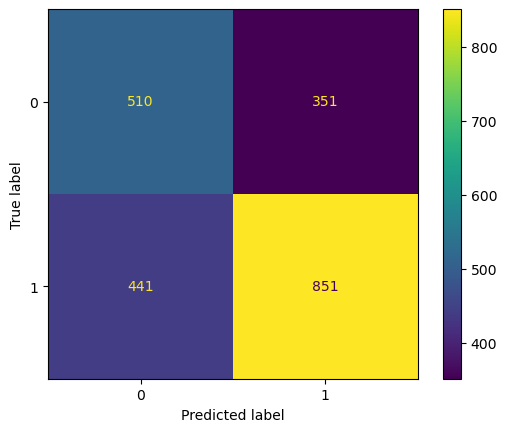

In [535]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test, best_model.predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

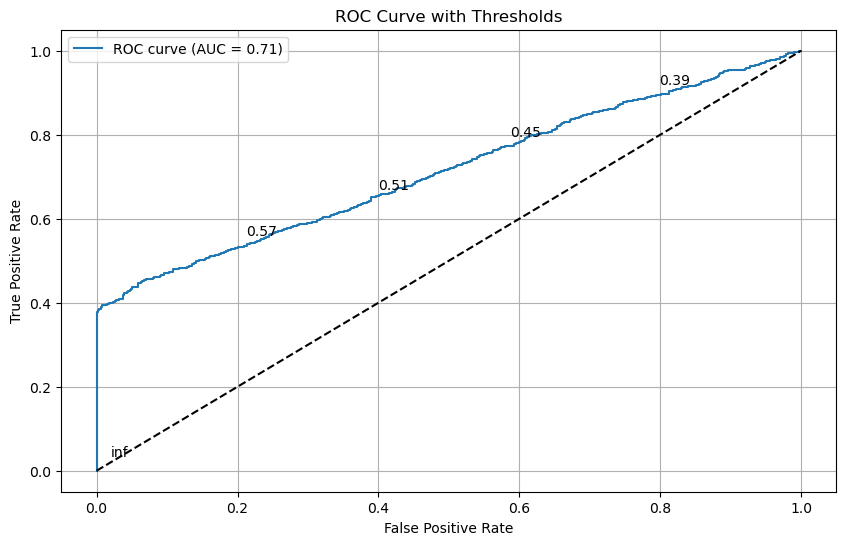

In [541]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Calculate ROC curve and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

# Add threshold annotations
for i in range(0, len(thresholds), len(thresholds)//5):  # Plot every nth threshold
   plt.annotate(f'{thresholds[i]:.2f}', 
               (fpr[i], tpr[i]),
               xytext=(10, 10),
               textcoords='offset points')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [517]:
f1_score(y_true=y_test,y_pred=best_model.predict(X_test))

0.6824378508420208

In [502]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       861
           1       0.71      0.66      0.68      1292

    accuracy                           0.63      2153
   macro avg       0.62      0.62      0.62      2153
weighted avg       0.64      0.63      0.63      2153



In [474]:
df.groupby(by = TARGET).mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Reached.on.Time_Y.N,,,,,,,,,,,,,,,,,,,
0,4.141061,2.967535,214.333333,3.666895,5.543896,4176.697074,0.171468,0.163695,0.166438,0.165524,0.332876,0.159579,0.163466,0.676955,0.073160,0.476452,0.434385,0.507545,0.492455
1,3.994053,3.003443,207.314085,3.504538,18.455399,3288.032707,0.164163,0.168858,0.166980,0.167293,0.332707,0.162128,0.158216,0.679656,0.092332,0.472300,0.422692,0.502817,0.497183


In [465]:
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_model=grid_search.best_estimator_

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
Best score:  0.6820354256108683


              precision    recall  f1-score   support

           0       0.55      0.91      0.68       861
           1       0.89      0.50      0.64      1292

    accuracy                           0.66      2153
   macro avg       0.72      0.70      0.66      2153
weighted avg       0.75      0.66      0.66      2153



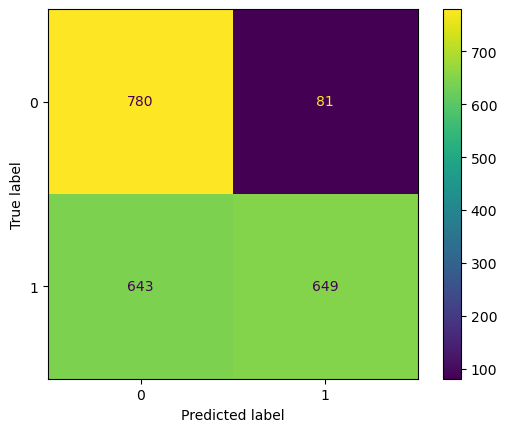

In [466]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test)))
conf_matrix=confusion_matrix(y_test, best_model.predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [467]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.91      0.68       861
           1       0.89      0.50      0.64      1292

    accuracy                           0.66      2153
   macro avg       0.72      0.70      0.66      2153
weighted avg       0.75      0.66      0.66      2153

